# 07wk-1: Pandas – `lambda df:`의 활용, MultiIndex의 이해, tidydata의

이해, `melt`/`stack`

최규빈  
2023-10-16

<a href="https://colab.research.google.com/github/guebin/DV2023/blob/main/posts/07wk-1.ipynb"><img src="https://colab.research.google.com/assets/colab-badge.svg" style="text-align: left"></a>

# 1. 강의영상

<https://youtu.be/playlist?list=PLQqh36zP38-yK6NIOpCR3OtlDVgglrzTE&si=v3TcGhzIZv7CGC6x>

# 2. Imports

In [1]:
import numpy as np
import pandas as pd
from plotnine import *

# 3. Pandas – `lambda df:`의 활용

## A. `lambda df:` with indexer

`-` ref:
<https://pandas.pydata.org/docs/user_guide/indexing.html#indexing-callable>

`예시1` : 표현1,2,3은 같은 문법이다.

In [2]:
df = pd.DataFrame({'A':[-1,np.nan,1,1],'B':[2,3,np.nan,4],'C':[np.nan,4,5,6]})
df

(표현1)

In [17]:
df[df.A.isna()]

(표현2)

In [30]:
df[(lambda _df: _df.A.isna())(df)]

(표현3)

In [69]:
df[lambda _df: _df.A.isna()] 

`#`

`예시2`: 예시1의 (표현3)은 `.loc`, `.iloc` 에서도 가능함

In [32]:
df = pd.DataFrame({'A':[-1,np.nan,1,1],'B':[2,3,np.nan,4],'C':[np.nan,4,5,6]})
df

In [71]:
df.loc[lambda _df: _df.A.isna(), :]

In [42]:
df.iloc[lambda _df: list(_df.A.isna()), :]

-   iloc은 True, False 형태로 이루어진 pd.Series가 들어올 경우 인덱싱이
    불가능하므로 리스트로 바꿔줘야했었음..

`#`

`예시3`: 왜 이런 문법이 있을까? 연속적으로 dataFrame을 변화시킬 경우
유리한 테크닉

In [43]:
df = pd.DataFrame({'A':[-1,np.nan,1,1],'B':[2,3,np.nan,4],'C':[np.nan,4,5,6]})
df

step1: D=A+B+C를 계산

In [59]:
df.assign(D=df.A+df.B+df.C)

step2: 여기에서 결측치의 값이 50%가 넘는 열만 고르고 싶다면?

In [62]:
df.assign(D=df.A+df.B+df.C).loc[:,lambda _df: _df.isna().mean()>0.5]

`#`

## B. `lambda df:` with assign

`예시1`

In [63]:
df = pd.DataFrame({'A':[-1,np.nan,1,1],'B':[2,3,np.nan,4],'C':[np.nan,4,5,6]})
df

step1: D=A+B+C

In [64]:
df.eval('D=A+B+C')

step2: 여기에서 결측치의 값을 row-wise하게 count하여 새로운열 `E`에
할당하고 싶다면?

In [77]:
df.eval('D=A+B+C').assign(E = lambda _df: _df.isna().sum(axis=1))

`#`

`예시2` – 원본데이터를 손상시키지 않으며 데이터를 변형하고 싶을때..

In [78]:
np.random.seed(43052)
df = pd.DataFrame({'A':[12,234,3456,12345,654222]})
df

(풀이1) – 복사본생성 (실패)

step1: 복사본생성 (?)

In [80]:
df2 = df 

In [82]:
df2

step2: B=log(A), C=(B-B.mean())/B.std()

In [85]:
df2['B'] = np.log(df2['A'])

In [86]:
df2

In [90]:
df2['C']=(df2['B']-df2['B'].mean())/df2['B'].std()
df2

In [92]:
df # 이게 왜 여기서 나오지?

(풀이2) – 복사본생성 (성공)

In [93]:
np.random.seed(43052)
df = pd.DataFrame({'A':[12,234,3456,12345,654222]})
df

step1: 복사본생성

In [94]:
df2 = df.copy()

In [95]:
df2

step2: B=log(A), C=(B-B.mean())/B.std()

In [96]:
df2['B'] = np.log(df2['A'])

In [97]:
df2

In [98]:
df2['C']=(df2['B']-df2['B'].mean())/df2['B'].std()
df2

In [99]:
df # 이게 왜 여기서 나오지?

(풀이3) – `assign` + `lambda df:` 이용

In [100]:
np.random.seed(43052)
df = pd.DataFrame({'A':[12,234,3456,12345,654222]})
df

In [104]:
df.assign(B=np.log(df.A)).assign(C= lambda df: (df.B-df.B.mean())/df.B.std())

(풀이4) – `eval` 이용

In [105]:
np.random.seed(43052)
df = pd.DataFrame({'A':[12,234,3456,12345,654222]})
df

In [108]:
df.eval('B= log(A)').eval('C= (B-B.mean())/(B.std())')

Note: eval이 가장 우수해보인다. 그렇지만 eval expression에 지원하는
함수는 한계가 있다. (sin,cos은 지원되는데 tan은 안된다든가..)

In [114]:
_df = pd.DataFrame({'A':np.linspace(-1.5,1.5,100)})
_df

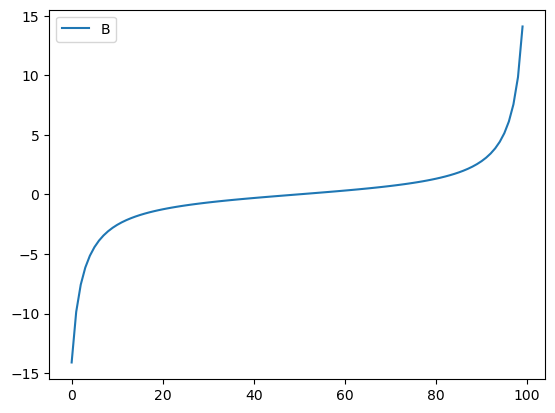

In [117]:
f = np.tan 
_df.eval('B=@f(A)').plot(y='B') # 그래서 이게 정석임..

# 4. Pandas – MultiIndex의 이해

## A. 원래 `df`, `s`는 딕셔너리 계열임

`-` 예시1: df는 dct에서 만들수 있음

In [118]:
dct = {'A': [1,2,3],'B': [2,3,4]}
df = pd.DataFrame(dct)
df

In [125]:
df['A']

`-` 예시2: s도 dct에서 만들수 있음

In [138]:
dct = {'43052': 80, '43053': 90, '43054': 50}
s = pd.Series(dct)
s

In [139]:
s['43052']

`-` 예시3: dict의 키로 올수 있는것들?

-   ref:
    <https://guebin.github.io/PP2023/posts/01_PythonBasic/2023-03-29-4wk-2.html>

튜플로 dct를 만든다면?

In [154]:
dct = {('43052',4): 80, ('43053',1): 90, ('43054',2): 50} # (학번,학년)
s = pd.Series(dct)
s

In [157]:
dct[('43052',4)]

In [158]:
s[('43052',4)]

In [159]:
s.index

## B. `.index` 혹은 `.columns`에 `name`이 있는 경우

`예시1`: index에 이름이 있는 경우 `['id']`

In [160]:
dct = {'43052': 80, '43053': 90, '43054': 50}
s = pd.Series(dct)
s

In [161]:
s.rename_axis(['id'])

In [457]:
s.index, s.rename_axis(['id']).index,

`#`

`예시2`: index에 이름이 있는 경우 `['id','year']`

In [169]:
dct = {('43052',4): 80, ('43053',1): 90, ('43054',2): 50} # (학번,학년)
s = pd.Series(dct)
s.rename_axis(['id','year'])

In [171]:
s.index

In [172]:
s.rename_axis(['id','year']).index

`#`

In [173]:
dct = {('43052',4): 80, ('43053',1): 90, ('43054',2): 50} # (학번,학년)
s = pd.Series(dct)
s.rename_axis(['id','year'])

`예시3`: 예시2가 데이터프레임이라면 이렇게 보인다

In [175]:
dct = {('43052',4): 80, ('43053',1): 90, ('43054',2): 50} # (학번,학년)
s = pd.Series(dct)
df = pd.DataFrame(s.rename_axis(['id','year']))
df

In [461]:
df.columns

In [462]:
df.index

`#`

`예시4`: 심슨의 역설 – 전체

In [183]:
df=pd.read_csv("https://raw.githubusercontent.com/guebin/DV2022/master/posts/Simpson.csv",index_col=0,header=[0,1])\
.stack().stack().reset_index()\
.rename({'level_0':'department','level_1':'result','level_2':'gender',0:'count'},axis=1).pivot_table(index='gender', columns='result', values='count', aggfunc=sum)
df

/tmp/ipykernel_2417284/2316601964.py:1: FutureWarning: The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.

In [464]:
df.index,df.columns

1열과 2열을 더하고 싶다면? 단순히 아래와 같이 하면 된다. (여기에서
`gender`,`result`는 각각 index 의 이름, columns의 이름일 뿐이므로 신경쓸
필요 없음)

In [195]:
df['fail']+df['pass']

`#`

`예시5`: 심슨의 역설 – 학과별

In [196]:
df = pd.read_csv("https://raw.githubusercontent.com/guebin/DV2022/master/posts/Simpson.csv",index_col=0,header=[0,1])\
.stack().stack().reset_index()\
.rename({'level_0':'department','level_1':'result','level_2':'gender',0:'count'},axis=1).pivot_table(index=['gender','department'], columns='result',values='count',aggfunc=sum)
df 

/tmp/ipykernel_2417284/2434963071.py:1: FutureWarning: The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.

In [467]:
df.index, df.columns

학과별 합격률을 알고 싶다면?

In [205]:
df.assign(rate = df['pass']/df.sum(axis=1))

`#`

# 5. Pandas – tidydata

## A. tidydata의 개념

`-` 아래의 자료는 불리하다. (뭐가??)

In [206]:
df = pd.read_csv("https://raw.githubusercontent.com/guebin/DV2022/master/posts/Simpson.csv",index_col=0,header=[0,1])\
.stack().stack().reset_index()\
.rename({'level_0':'department','level_1':'result','level_2':'gender',0:'count'},axis=1).pivot_table(index=['gender','department'], columns='result',values='count',aggfunc=sum)
df 

/tmp/ipykernel_2417284/2434963071.py:1: FutureWarning: The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.

`-` 가정1: 만약에 A학과에 해당하는 결과만 뽑고 싶다면? –\> departmet가
column으로 있어야함..

`-` 가정2: 이 데이터를 바탕으로 합격한사람만 bar plot을 그리고 싶다면?
–\> department, gender, pass 가 column으로 있어야함..

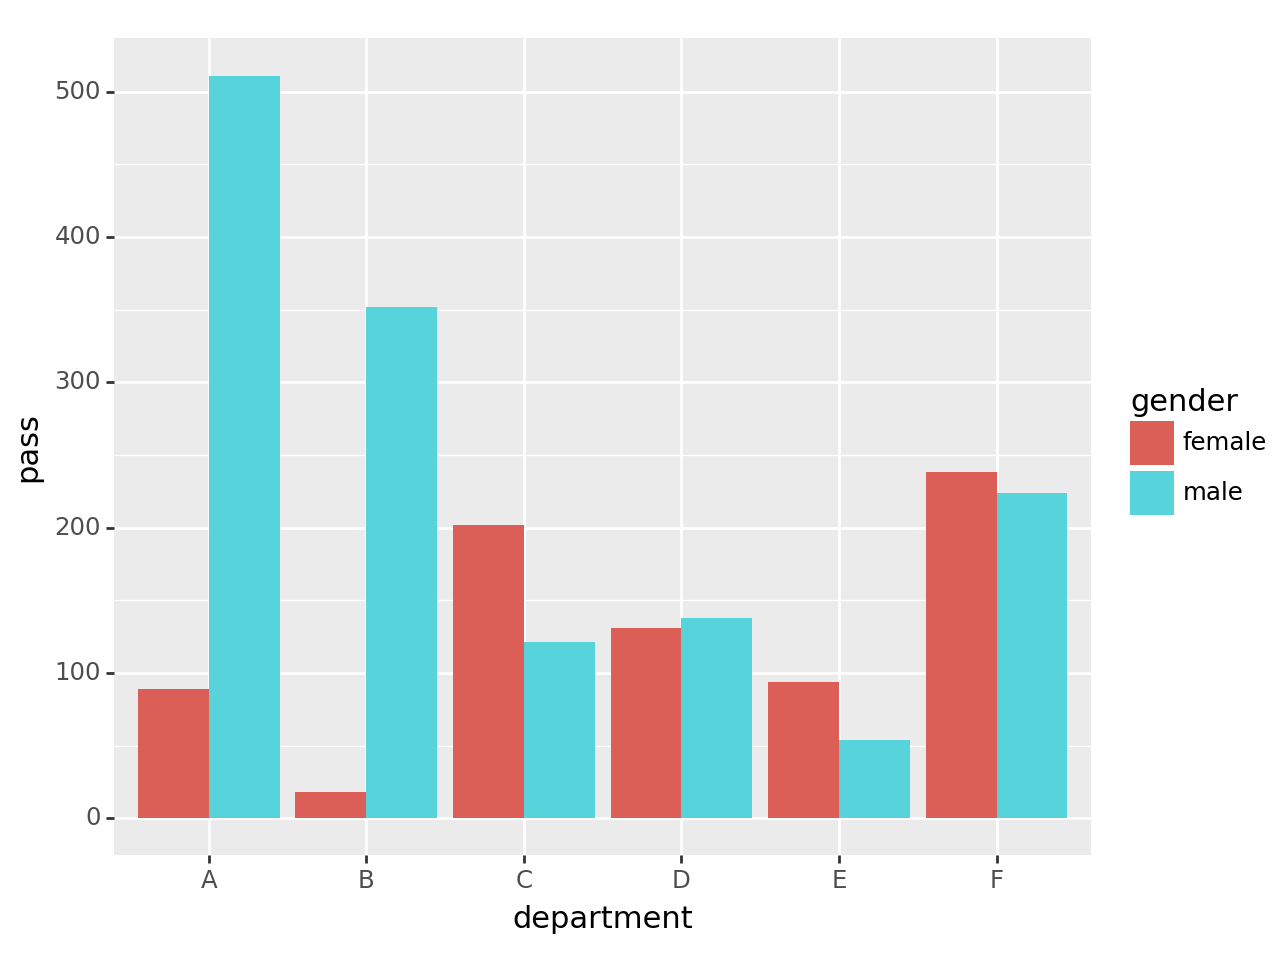

In [479]:
tidydata = df['pass'].reset_index()
#---# 
fig = ggplot(tidydata)
col = geom_col(aes(x='department',y='pass',fill='gender'),position='dodge')
fig + col

`-` tidydata 정의: <https://r4ds.had.co.nz/tidy-data.html>

1.  Each variable must have its own column.
2.  Each observation must have its own row.
3.  Each value must have its own cell.

## B. tidydata가 아닌 예시

`예시1` – MultiIndex 구조를 가지면 무조건 tidydata가 아니다.

In [213]:
df = pd.read_csv("https://raw.githubusercontent.com/guebin/DV2022/master/posts/Simpson.csv",index_col=0,header=[0,1])\
.stack().stack().reset_index()\
.rename({'level_0':'department','level_1':'result','level_2':'gender',0:'count'},axis=1).pivot_table(index=['gender','department'], columns='result',values='count',aggfunc=sum)
df 

/tmp/ipykernel_2417284/2434963071.py:1: FutureWarning: The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.

-   이건 tidydata가 아니고

In [481]:
tidydata = df.stack().reset_index().rename({0:'applicant_count'},axis=1)
tidydata 

-   이것이 tidydata

`-` 구분하는 방법1: 직관에 의한 설명

-   query쓰기 불편: 남성지원자만 뽑고 싶다면?, 학과A만 뽑고싶다면?
    탈락한지원자만 뽑고싶다면? 학과A에서 탈락한 지원자만 뽑고싶다면??
-   시각화하기 불편:
-   하여튼 다루기 불편해..

`-` 구분하는 방법2: 정의에 의한 설명

-   `df`는 원칙 1에 위배된다. (왜냐하면 `gender`,
    `department`,`result`,`applicant_count`에 해당하는 변수는 하나의
    컬럼을 차지하지 못함)
-   `df`는 원칙 2에 위배된다. (왜냐하면 하나의 행에 2개의
    `applicant_count` observation이 존재함)

`#`

`예시2` – 아래의 자료는 tidydata가 아니다.

In [482]:
df=pd.read_csv("https://raw.githubusercontent.com/guebin/DV2022/master/posts/Simpson.csv",index_col=0,header=[0,1])\
.stack().stack().reset_index()\
.rename({'level_0':'department','level_1':'result','level_2':'gender',0:'count'},axis=1).pivot_table(index='gender', columns='result', values='count', aggfunc=sum)\
.assign(pass_fail = lambda df: list(map(lambda x,y: (y,x),df['fail'],df['pass']))).drop(['fail','pass'],axis=1).reset_index()
df

/tmp/ipykernel_2278789/2865855793.py:1: FutureWarning: The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.

-   이 `df`는 원칙 3에 위배된다.

`#`

`# 예시3` – wide df

In [214]:
df=pd.read_csv('https://raw.githubusercontent.com/guebin/2021DV/master/_notebooks/phone.csv')
df

-   이건 tidydata 가 아니고

In [484]:
tidydata = df.melt(id_vars='Date').assign(Date = lambda _df: _df.Date.apply(pd.to_datetime))
tidydata

-   이건 tidydata 이다.

`-` df를 가지고 아래와 같은 그림을 그릴 수 있겠어?

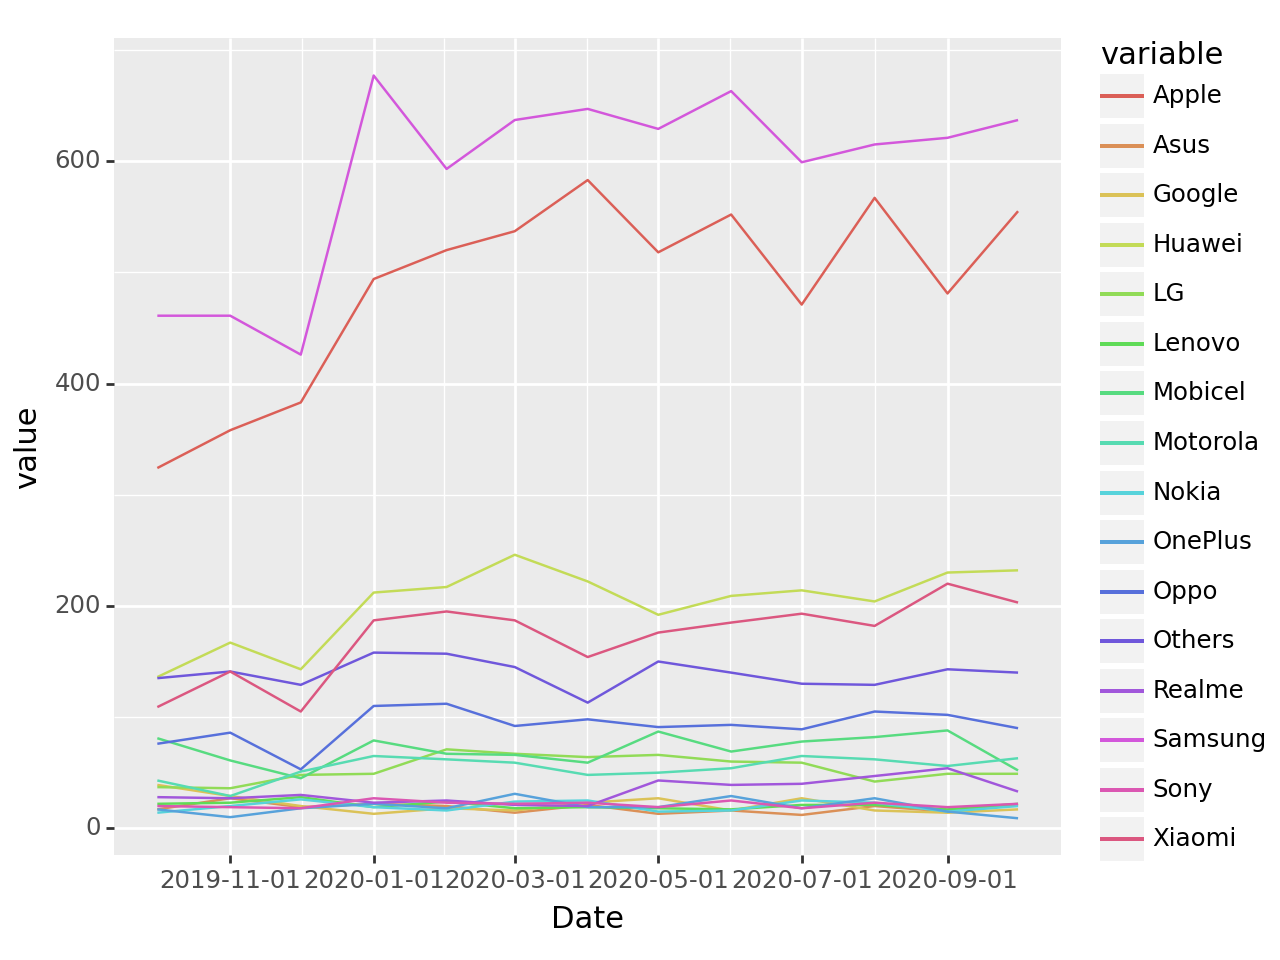

In [485]:
fig = ggplot(tidydata)
line = geom_line(aes(x='Date',y='value',color='variable'))
fig + line

# 6. Pandas – `melt`/`stack`

## A. `reset_index()`

> 중첩구조를 가지는 series일 경우 `.reset_index()`를 사용하면 쉽게
> tidydata를 얻을 수 있다.

`-` 예시1

In [215]:
dct = {'43052': 80, '43053': 90, '43054': 50}
s = pd.Series(dct)
s

In [216]:
s.reset_index()

`-` 예시2

In [217]:
dct = {('43052',4): 80, ('43053',1): 90, ('43054',2): 50} # (학번,학년)
s = pd.Series(dct)
s

In [220]:
s.reset_index()

`-` 예시3

In [221]:
df=pd.read_csv("https://raw.githubusercontent.com/guebin/DV2022/master/posts/Simpson.csv",index_col=0,header=[0,1]).stack().stack()
df

In [223]:
df.reset_index()

`-` 예시4 – `.reset_index()` 는 말그대로 index를 reset 하는 명령어, 꼭
`pd.Series`에만 쓰는건 아니다.

In [224]:
df=pd.read_csv("https://raw.githubusercontent.com/guebin/DV2022/master/posts/Simpson.csv",index_col=0,header=[0,1]).stack()
df

In [225]:
df.reset_index()

## B. `melt()`

`# 예시1`: 아래의 자료를 tidydata로 만들라.

In [226]:
df = pd.read_csv('https://raw.githubusercontent.com/guebin/2021DV/master/_notebooks/phone.csv')
df

(풀이1) `.melt()` – 실패

In [237]:
df.melt()

(풀이2) `.melt(id_vars=)` – 성공

In [238]:
df.melt(id_vars='Date')

`#`

## C. `stack()` + `reset_index()`

> 제 최애테크닉: DataFrame을 MultiIndex를 가지는 Series로 “일부러”
> 변환하고 reset_index()를 시킴

`# 예시1`: 아래의 자료를 tidydata로 만들라.

In [239]:
df = pd.read_csv('https://raw.githubusercontent.com/guebin/2021DV/master/_notebooks/phone.csv')
df

In [247]:
df.set_index('Date').stack().reset_index()

`#`

`# 예시2`: 아래의 자료를 tidydata로 만들어라.

In [248]:
df = pd.read_csv("https://raw.githubusercontent.com/guebin/DV2022/master/posts/Simpson.csv",index_col=0,header=[0,1])
df

In [254]:
df.stack().stack().reset_index()

`#`

## D. `unstack() + reset_index()`

`# 예시1` – `.stack()`과 `.unstack()`은 반대연산

In [270]:
df=pd.read_csv('https://raw.githubusercontent.com/PacktPublishing/Pandas-Cookbook/master/data/flights.csv')\
.groupby(["AIRLINE","WEEKDAY"]).agg({"CANCELLED":[np.mean,"count"],"DIVERTED":[np.mean,"count"]})
df

/tmp/ipykernel_2417284/3693914824.py:2: FutureWarning: The provided callable <function mean at 0x7fbb9032c310> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
/tmp/ipykernel_2417284/3693914824.py:2: FutureWarning: The provided callable <function mean at 0x7fbb9032c310> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.

In [274]:
df.stack().unstack()

`#`

`# 예시2` – 아래의 자료를 tidydata로 만들라.

In [275]:
df=pd.read_csv('https://raw.githubusercontent.com/PacktPublishing/Pandas-Cookbook/master/data/flights.csv')\
.groupby(["AIRLINE","WEEKDAY"]).agg({"CANCELLED":[np.mean,"count"],"DIVERTED":[np.mean,"count"]})
df

/tmp/ipykernel_2417284/3693914824.py:2: FutureWarning: The provided callable <function mean at 0x7fbb9032c310> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
/tmp/ipykernel_2417284/3693914824.py:2: FutureWarning: The provided callable <function mean at 0x7fbb9032c310> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.

(풀이1) – stack 2번

In [277]:
df.stack().stack().reset_index()

(풀이2) – unstack 2번

In [278]:
df.unstack().unstack().reset_index()

`예시3` – 아래의 자료를 tidydata로 만들어라.

In [279]:
df=pd.read_csv("https://raw.githubusercontent.com/guebin/DV2022/master/posts/Simpson.csv",index_col=0,header=[0,1])
df

(풀이1) – stack 2번

In [282]:
df.stack().stack().reset_index()

(풀이2) – unstack 1번

In [285]:
df.unstack().reset_index()

# 7. HW

아래의 자료를 tidydata로 변환하라.

In [527]:
s = pd.Series({
    ('female','A'):0.5,
    ('female','B'):0.2,
    ('male','A'):0.3,
    ('male','B'):0.7
})
s

In [528]:
# 출력결과는 아래와 같아야 한다. 